In [217]:
'''
Set up the learning procedure to allow DNA sequences as input and
to produce an output of the likelihood that an input is a true Rap1
binding site. You will want the output value to be a real number no
matter what method you are using, since your performance on the blind
test set will be judged based on the area under an ROC curve. So,
please DO NOT threshold your output to produce a binary value.

	- As mentioned above, you may use your ANN implementation.
    Many very successful projects have done so in the past. However,
    you may also use KNN, SVM, random forests, or any other approach
    that you see fit.

	- Describe the machine learning approach in detail. This will include,
    for an ANN, a description of the network structure of your encodings
    of inputs and output. For an SVM, you will need to discuss input
    encoding as well as kernel function choices, etc... This will also
    include a description of the representation you have chosen for the
    input DNA sequences.

'''
import numpy as np
import keras

# define reverse complements to expand positive binding site data set
def reverse_complement(sequence):
    comp_nucleotide = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}
    rev_seq = ''
    for nuc in sequence[::-1]:
        rev_seq += comp_nucleotide[nuc]
    return(rev_seq)
    
# import positive dna sequences and their reverse complements
filepath_rap_pos = '../data/rap1-lieb-positives.txt'
rap_pos = []
text_rap_pos = open(filepath_rap_pos)
for line in text_rap_pos:
    sequence = line.strip()
    rap_pos.append(sequence)
    rap_pos.append(reverse_complement(sequence))

# import negative binding sequences - we probably don't really need all of this
# data since we only have 137 positive examples, so just take the first 17
# nucleotides from each sequence
filepath_rap_neg = '../data/yeast-upstream-1k-negative.fa'
rap_neg = []
text_rap_neg = open(filepath_rap_neg)
for line in text_rap_neg:
    if line[0] != '>':
        sequence = line.strip()[0:17]
        if len(sequence) == 17:
            rap_neg.append(sequence)

# make sure there is no overlap (this should remove 2 sequences from rap_neg)
overlap = 0
for i in rap_neg:
    if i in rap_pos:
        rap_neg.remove(i)

# convert dna sequences to a numerically encoded form
numerical_seq = {'A':[1,0,0,0],'T':[0,1,0,0],'C':[0,0,1,0],'G':[0,0,0,1]}

def let_to_num(a_sequence_collection):
    n = len(a_sequence_collection)
    num_sequence = np.zeros((n, 17, 4))
    for i in range(n):
        for j in range(17):
            nuc = a_sequence_collection[i][j]
            num_sequence[i][j] = numerical_seq[nuc]
    return(num_sequence)
    

rap_pos_num = let_to_num(rap_pos)
rap_neg_num = let_to_num(rap_neg)

np.save('../output/rap_positives', rap_pos_num)
np.save('../output/rap_negatives', rap_neg_num)


In [282]:
rap_pos_num.shape

(274, 17, 4)

In [326]:
'''
Create a neural network using Keras (faster, more flexible and probably more
reliable that what I've written in nn_Q1.py)
'''
from keras.models import Sequential
from keras.layers import Dense, Activation, 1DConvolution
from keras.utils.np_utils import to_categorical

SyntaxError: invalid syntax (<ipython-input-326-12b6448ef388>, line 6)

In [335]:
'''
Create a neural network using Keras (faster, more flexible and probably more
reliable that what I've written in nn_Q1.py)
'''

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv1D
from keras.utils.np_utils import to_categorical

rap_neg_num_sub = rap_neg_num[0:274]

x = np.append(rap_pos_num, rap_neg_num_sub, axis = 0)
y = np.array([1] * len(rap_pos_num) + [0] * len(rap_neg_num_sub))

neural_net = Sequential()
neural_net.add(Conv1D(nb_filter = 10, filter_length = 3, input_shape = (17,4)))
neural_net.add(Flatten())
neural_net.add(Dense(10))
neural_net.add(Activation('relu'))
neural_net.add(Dense(8))
neural_net.add(Activation('sigmoid'))
neural_net.add(Dense(1))
neural_net.add(Activation('sigmoid'))

neural_net.compile(loss='mse', optimizer='sgd')

neural_net.fit(x = x, y = y, batch_size = 32, nb_epoch = 100)


Epoch 1/100
548/548 [==============================] - 0s - loss: 0.2526     
Epoch 2/100
548/548 [==============================] - 0s - loss: 0.2521     
Epoch 3/100
548/548 [==============================] - 0s - loss: 0.2517     
Epoch 4/100
548/548 [==============================] - 0s - loss: 0.2513     
Epoch 5/100
548/548 [==============================] - 0s - loss: 0.2511     
Epoch 6/100
548/548 [==============================] - 0s - loss: 0.2509     
Epoch 7/100
548/548 [==============================] - 0s - loss: 0.2508     
Epoch 8/100
548/548 [==============================] - 0s - loss: 0.2505     
Epoch 9/100
548/548 [==============================] - 0s - loss: 0.2503     
Epoch 10/100
548/548 [==============================] - 0s - loss: 0.2501     
Epoch 11/100
548/548 [==============================] - 0s - loss: 0.2500     
Epoch 12/100
548/548 [==============================] - 0s - loss: 0.2498     
Epoch 13/100
548/548 [==============================] - 0s - 

In [336]:
output = neural_net.predict_classes(x)

480/548 [=========================>....] - ETA: 0s

In [337]:
print(np.average(output[0:int(548/2)]))
print(np.average(output[int(548/2):548]))

0.86496350365
0.175182481752


In [338]:
np.ndarray.flatten(output)

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

In [281]:
plt.figure(facecolor = 'white', figsize = (8,5))
plt.imshow(x[0].T, interpolation = 'nearest', cmap = 'Greys')
plt.yticks(range(4),['A','T','C','G'])
plt.xticks(range(17), range(1,18))
plt.ylabel('Nucleotide')
plt.xlabel('Position')
plt.title('One-Hot Encoding of Potential Binding Sites')
plt.savefig('../output/one_hot.png')

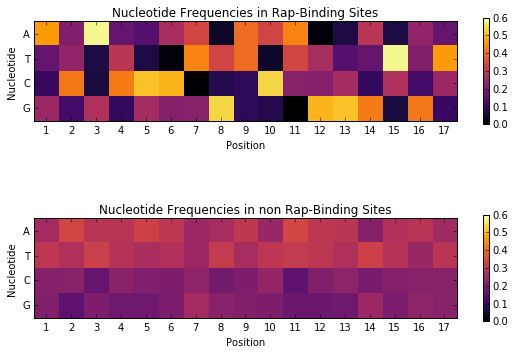

In [280]:
x1 = np.average(rap_pos_num, axis = 0)
x2 = np.average(x[int(len(x)/2):len(x)], axis = 0)

plt.figure(facecolor = 'white', figsize = (8,6))
plt.subplot(211)
plt.imshow(x1.T, interpolation = 'nearest', cmap = 'inferno', vmin = 0, vmax = 0.6)
plt.yticks(range(4),['A','T','C','G'])
plt.xticks(range(17), range(1,18))
plt.ylabel('Nucleotide')
plt.xlabel('Position')
plt.title('Nucleotide Frequencies in Rap-Binding Sites')
plt.colorbar(shrink = 0.5, ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6])

plt.subplot(212)
plt.imshow(x2.T, interpolation = 'nearest', cmap = 'inferno', vmin = 0, vmax = 0.6)
plt.yticks(range(4),['A','T','C','G'])
plt.xticks(range(17), range(1,18))
plt.ylabel('Nucleotide')
plt.xlabel('Position')
plt.title('Nucleotide Frequencies in non Rap-Binding Sites')
plt.colorbar(shrink = 0.5, ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6])

plt.tight_layout()
plt.savefig('../output/nuc_pos_frequencies.png')

In [308]:
x = np.load('../output/x_data.npy')
y = np.load('../output/y_data.npy')

# split into equally sized training and test sets with equally represented
# positive and negative examples (will test the effect of these numbers later)

pos_ix = [i for i in range(len(y)) if y[i] == 1]
neg_ix = [i for i in range(len(y)) if y[i] == 0]

n = int(len(pos_ix)/2)

train_set = pos_ix[0:n] + neg_ix[0:n]
test_set = pos_ix[n:2*n] + neg_ix[n:2*n]

x_train = x[train_set]
y_train = y[train_set]

x_test = x[test_set]
y_test = y[test_set]

In [317]:
from keras.layers.convolutional import MaxPooling1D

model = Sequential()
model.add(Conv1D(input_dim=4, input_length=17, nb_filter=10,
                 filter_length=5, border_mode="valid", activation="relu"))

model.add(MaxPooling1D(pool_length=5, stride=5))


model.add(Flatten())

model.add(Dense(activation="relu"))

model.add(Dense(activation="sigmoid"))


neural_net.compile(loss='mse', optimizer='sgd')
neural_net.fit(x = x_train, y = y_train, batch_size = 32, nb_epoch = 100)


TypeError: __init__() missing 1 required positional argument: 'output_dim'

In [322]:
keras.utils.np_utils.to_categorical(np.array(rap_pos))

TypeError: cannot perform reduce with flexible type

In [323]:
numerical_seq = {'A':0,'T':1,'C':2,'G':3}

def let_to_num(a_sequence_collection):
    n = len(a_sequence_collection)
    num_sequence = np.zeros((n, 17, 4))
    for i in range(n):
        for j in range(17):
            nuc = a_sequence_collection[i][j]
            num_sequence[i][j] = numerical_seq[nuc]
    return(num_sequence)
    
x = let_to_num(rap_pos)

In [325]:
keras.utils.np_utils.to_categorical(x)

/usr/local/lib/python3.5/site-packages/keras/utils/np_utils.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = np.zeros((len(y), nb_classes))


IndexError: arrays used as indices must be of integer (or boolean) type

In [351]:
train_ix = np.random.choice(range(250), 125, replace = False)
test_ix = np.array([i for i in range(250) if i not in train_ix])

In [352]:
train_ix

array([ 30,  47, 188, 218, 119,   8, 203, 209,  63,  86,  15,  25,  31,
       244, 220, 207,   4, 153, 240,  90, 112,   0,  20, 210,   6, 139,
        79, 122, 124,  80,  64, 102, 140,  41,  26, 164, 213, 178, 232,
       238, 195, 167,  98, 247,  21, 117,  56, 134, 133, 230,  58,  37,
        81, 135, 171, 126, 142, 200, 123,  50, 227, 152, 197,  44, 215,
       181, 141,  76, 110, 231, 154, 198,  42, 148, 174, 237,  10, 121,
       106, 170,  62,   3, 166,  89,   5, 115, 193,  82,  85,  71, 156,
       189, 130, 161,  46, 245, 175, 204, 219, 149,  35, 224, 246, 185,
        87, 162,  23,  16, 225, 101, 226, 150, 131,  52, 243,  91,  95,
        55, 205,  61,  70, 136, 109, 169,   1])

In [356]:
print(len([range(250)[i] for i in test_ix] + [range(250)[i] for i in test_ix]))
print(len([range(250)[i] for i in test_ix]))


250
125


In [358]:
print([i for i in range(2,20,2)])

[2, 4, 6, 8, 10, 12, 14, 16, 18]
